In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime

# Set styles
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# Define stock tickers and date range
tech_list = ['COALINDIA.NS', 'NESTLEIND.NS', 'ADANIENT.NS', 'TATASTEEL.NS']
start, end = datetime(datetime.now().year - 2, datetime.now().month, datetime.now().day), datetime.now()

# Download data, add company names, and concatenate
df = (pd.concat({t: yf.download(t, start, end).assign(Company=t) for t in tech_list}, names=['Ticker', 'Date'])
        .reset_index())

# Flatten MultiIndex columns
df.columns = ['_'.join(col) if isinstance(col, tuple) and col[1] else col[0] for col in df.columns]

df


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Ticker,Date,Close_COALINDIA.NS,High_COALINDIA.NS,Low_COALINDIA.NS,Open_COALINDIA.NS,Volume_COALINDIA.NS,Company,Close_NESTLEIND.NS,High_NESTLEIND.NS,...,Close_ADANIENT.NS,High_ADANIENT.NS,Low_ADANIENT.NS,Open_ADANIENT.NS,Volume_ADANIENT.NS,Close_TATASTEEL.NS,High_TATASTEEL.NS,Low_TATASTEEL.NS,Open_TATASTEEL.NS,Volume_TATASTEEL.NS
0,COALINDIA.NS,2023-03-24,182.226471,186.990845,181.833085,186.422622,6611089.0,COALINDIA.NS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,COALINDIA.NS,2023-03-27,182.182770,183.756328,181.483422,182.270195,4002212.0,COALINDIA.NS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,COALINDIA.NS,2023-03-28,182.619858,184.674227,182.226472,183.056957,6157526.0,COALINDIA.NS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,COALINDIA.NS,2023-03-29,186.160370,187.865052,182.182768,183.537777,16734166.0,COALINDIA.NS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,COALINDIA.NS,2023-03-31,186.772293,187.340529,184.586799,185.504709,5139018.0,COALINDIA.NS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1959,TATASTEEL.NS,2025-03-17,NaN,NaN,NaN,NaN,NaN,TATASTEEL.NS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,151.809998,152.639999,150.899994,151.990005,35879780.0
1960,TATASTEEL.NS,2025-03-18,NaN,NaN,NaN,NaN,NaN,TATASTEEL.NS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,151.809998,151.809998,151.809998,151.809998,0.0
1961,TATASTEEL.NS,2025-03-19,NaN,NaN,NaN,NaN,NaN,TATASTEEL.NS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,158.600006,159.199997,156.500000,156.800003,66161413.0
1962,TATASTEEL.NS,2025-03-20,NaN,NaN,NaN,NaN,NaN,TATASTEEL.NS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,159.039993,160.100006,156.649994,160.000000,39889517.0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1964 entries, 0 to 1963
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Ticker               1964 non-null   object        
 1   Date                 1964 non-null   datetime64[ns]
 2   Close_COALINDIA.NS   491 non-null    float64       
 3   High_COALINDIA.NS    491 non-null    float64       
 4   Low_COALINDIA.NS     491 non-null    float64       
 5   Open_COALINDIA.NS    491 non-null    float64       
 6   Volume_COALINDIA.NS  491 non-null    float64       
 7   Company              1964 non-null   object        
 8   Close_NESTLEIND.NS   491 non-null    float64       
 9   High_NESTLEIND.NS    491 non-null    float64       
 10  Low_NESTLEIND.NS     491 non-null    float64       
 11  Open_NESTLEIND.NS    491 non-null    float64       
 12  Volume_NESTLEIND.NS  491 non-null    float64       
 13  Close_ADANIENT.NS    491 non-null

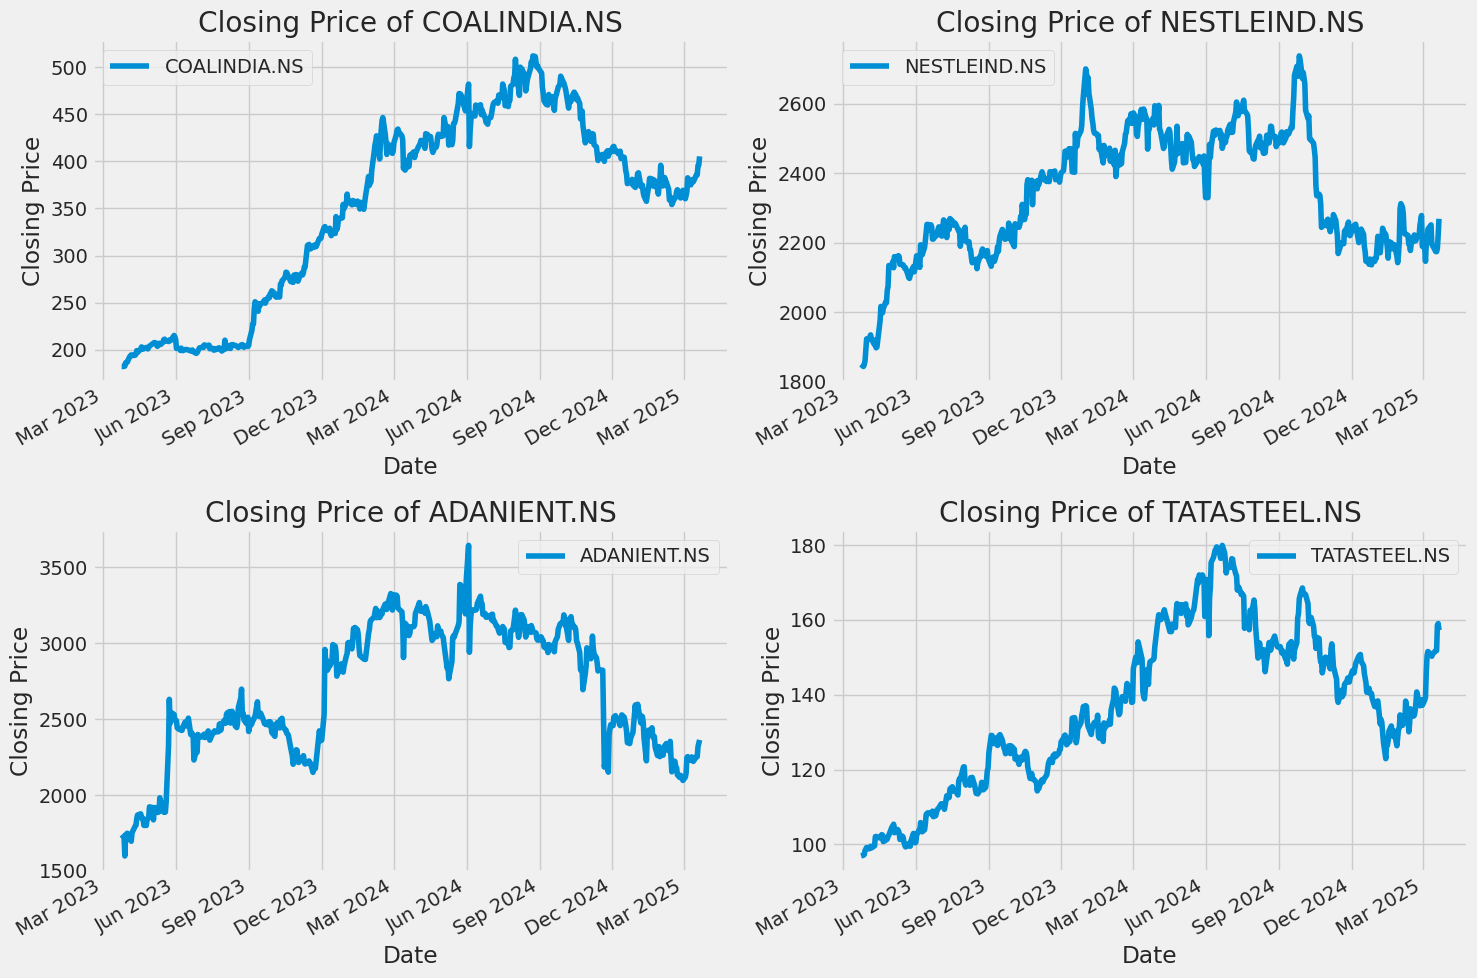

In [67]:
import matplotlib.dates as mdates

plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.3, top=0.9)  # Increase vertical spacing

company_list = ['COALINDIA.NS', 'NESTLEIND.NS', 'ADANIENT.NS', 'TATASTEEL.NS']

for i, company in enumerate(company_list, 1):
    ax = plt.subplot(2, 2, i)

    plt.plot(df['Date'], df[f'Close_{company}'], label=company)

    # Format x-axis for better readability
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

    plt.ylabel('Closing Price')
    plt.xlabel('Date')
    plt.title(f"Closing Price of {company}")
    plt.legend()

    plt.xticks(rotation=30, ha='right')  # Rotate labels for better visibility

plt.tight_layout()
plt.show()


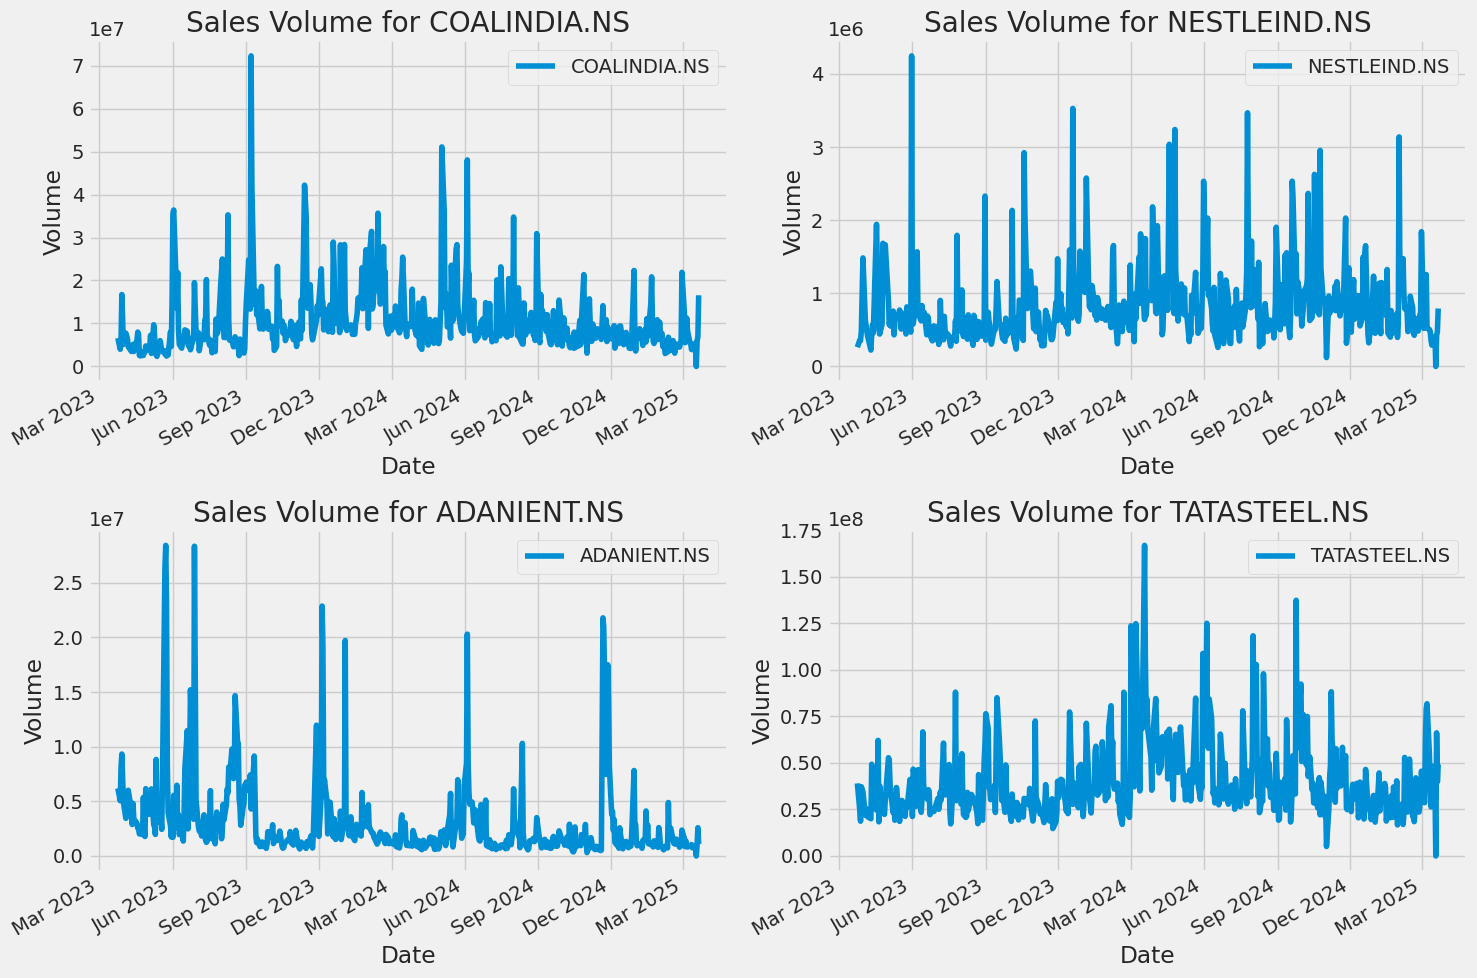

In [68]:
import matplotlib.dates as mdates

plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.3, top=0.9)  # Increase vertical spacing

company_list = ['COALINDIA.NS', 'NESTLEIND.NS', 'ADANIENT.NS', 'TATASTEEL.NS']

for i, company in enumerate(company_list, 1):
    ax = plt.subplot(2, 2, i)

    plt.plot(df['Date'], df[f'Volume_{company}'], label=company)

    # Format x-axis for better readability
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

    plt.ylabel('Volume')
    plt.xlabel('Date')
    plt.title(f"Sales Volume for {company}")
    plt.legend()

    plt.xticks(rotation=30, ha='right')  # Rotate labels for better visibility

plt.tight_layout()
plt.show()


In [69]:
import matplotlib.dates as mdates

# Moving Average Days
ma_day = [10, 20, 50]

# Calculate moving averages and add to DataFrame
for ma in ma_day:
    for company in company_list:
        column_name = f"MA_{ma}_{company}"
        df[column_name] = df[f'Close_{company}'].rolling(ma).mean()

<ipython-input-70-6459feea2602>:26: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.92)  # Increased top margin


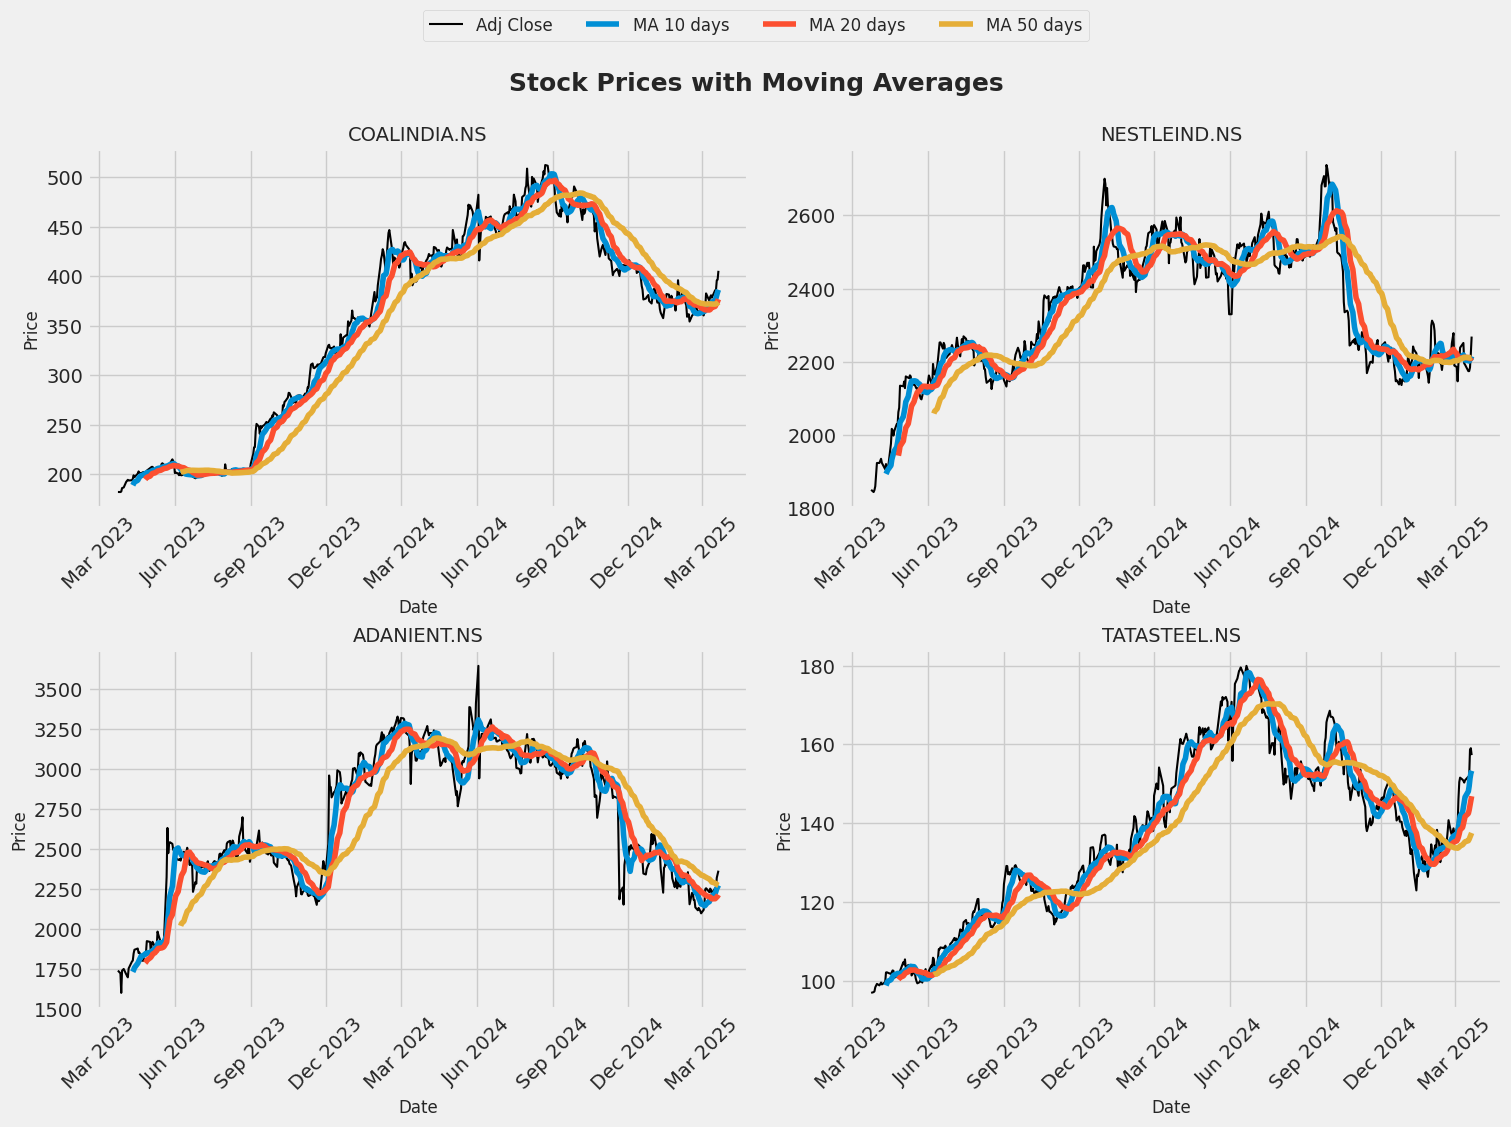

In [70]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create a 2x2 grid of subplots with more spacing
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10), constrained_layout=True)

# Set the overall title with extra padding
fig.suptitle("Stock Prices with Moving Averages", fontsize=18, fontweight='bold', y=1.05)

# Loop through the companies and plot
for ax, company in zip(axes.flatten(), company_list):
    ax.plot(df['Date'], df[f'Close_{company}'], label='Adj Close', color='black', linewidth=1.5)
    for ma in ma_day:
        ax.plot(df['Date'], df[f"MA_{ma}_{company}"], label=f"MA {ma} days")

    ax.set_title(company, fontsize=14)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Price", fontsize=12)

    # Format x-axis for better readability
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.tick_params(axis='x', rotation=45)

# Adjust spacing to fit everything nicely
plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.92)  # Increased top margin

# Create a single legend outside the entire figure
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.12), ncol=4, fontsize=12)

plt.show()


In [71]:
# Get the stock quote
df1 = yf.download('ADANIENT.NS', start='2012-01-01', end='2024-01-01')
# Show teh data
df1

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS,ADANIENT.NS
Date,,,,,
2012-01-02,37.327038,37.889563,36.596405,37.889563,4426427
2012-01-03,37.158924,38.018875,36.693388,37.501613,7148175
2012-01-04,35.969219,38.018876,35.717054,37.158925,7327278
2012-01-05,34.540276,35.911023,34.268710,35.704118,6668403
2012-01-06,34.727787,35.367899,33.757918,34.010083,7823555
...,...,...,...,...,...
2023-12-22,2807.218018,2846.452195,2790.274655,2814.814808,1513956
2023-12-26,2864.294922,2892.583563,2798.971410,2815.864500,2048484


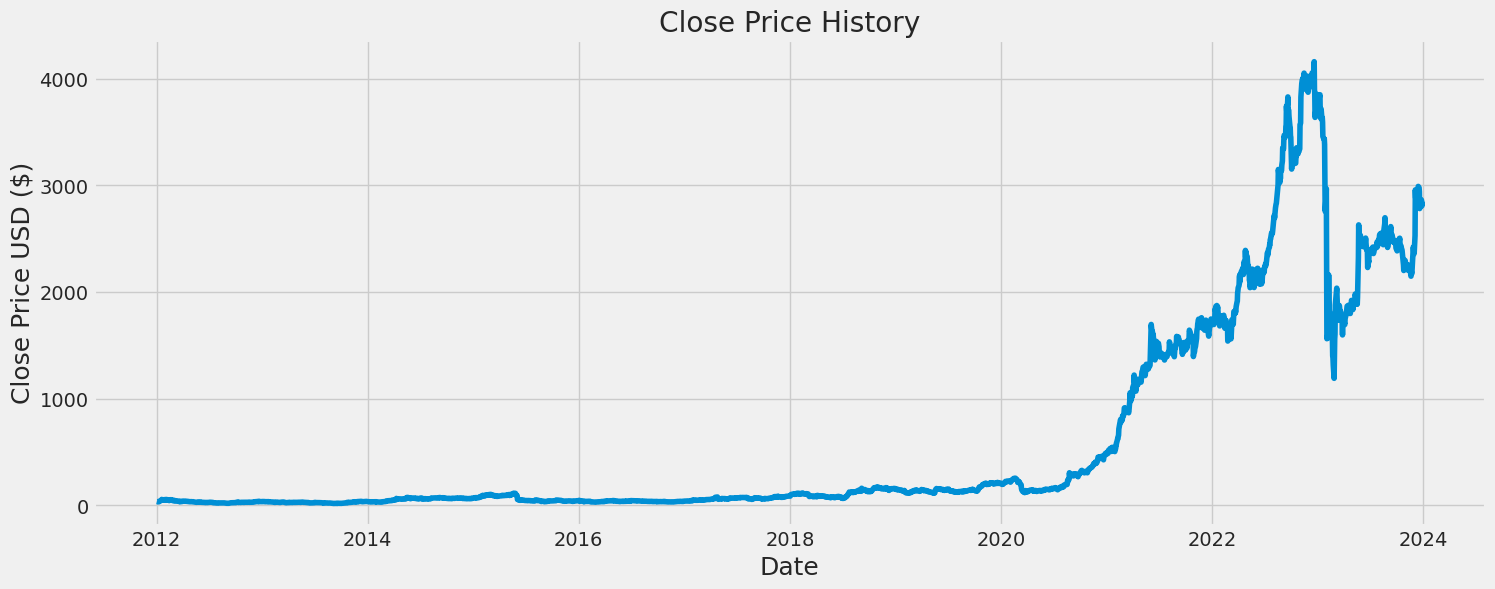

In [72]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df1['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [86]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

df1.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Now try extracting 'Close'
data1 = df1[['Close']].copy()
dataset = data1.values

# Determine training data length (95% for training)
training_data_len = int(len(dataset) * 0.95)

# Scale the data (normalization)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create training dataset
train_data = scaled_data[:training_data_len, :]

# Prepare x_train and y_train
x_train, y_train = [], []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])  # 60 previous values
    y_train.append(train_data[i, 0])  # Target value

# Convert to NumPy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape data for LSTM input (samples, timesteps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25, activation='relu'))  # Added activation function for stability
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=16, epochs=10)  # Increased epochs and batch_size

# Prepare testing data
test_data = scaled_data[training_data_len - 60:, :]
x_test, y_test = [], dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert to NumPy arrays
x_test = np.array(x_test)

# Reshape for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get model predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Rescale back

# Calculate RMSE
rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
print("RMSE:", rmse)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - loss: 0.0060
Epoch 2/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - loss: 5.9353e-04
Epoch 3/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - loss: 7.5044e-04
Epoch 4/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - loss: 3.3269e-04
Epoch 5/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - loss: 3.8936e-04
Epoch 6/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 20s 74ms/step - loss: 3.0246e-04
Epoch 7/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - loss: 2.8190e-04
Epoch 8/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 21s 85ms/step - loss: 1.8779e-04
Epoch 9/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - loss: 2.3615e-04
Epoch 10/10
172/172 ━━━━━━━━━━━━━━━━━━━━ 20s 76ms/step - loss: 1.9819e-04


3/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step 

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step
RMSE: 86.70594944197904


<ipython-input-87-962b0d888d53>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


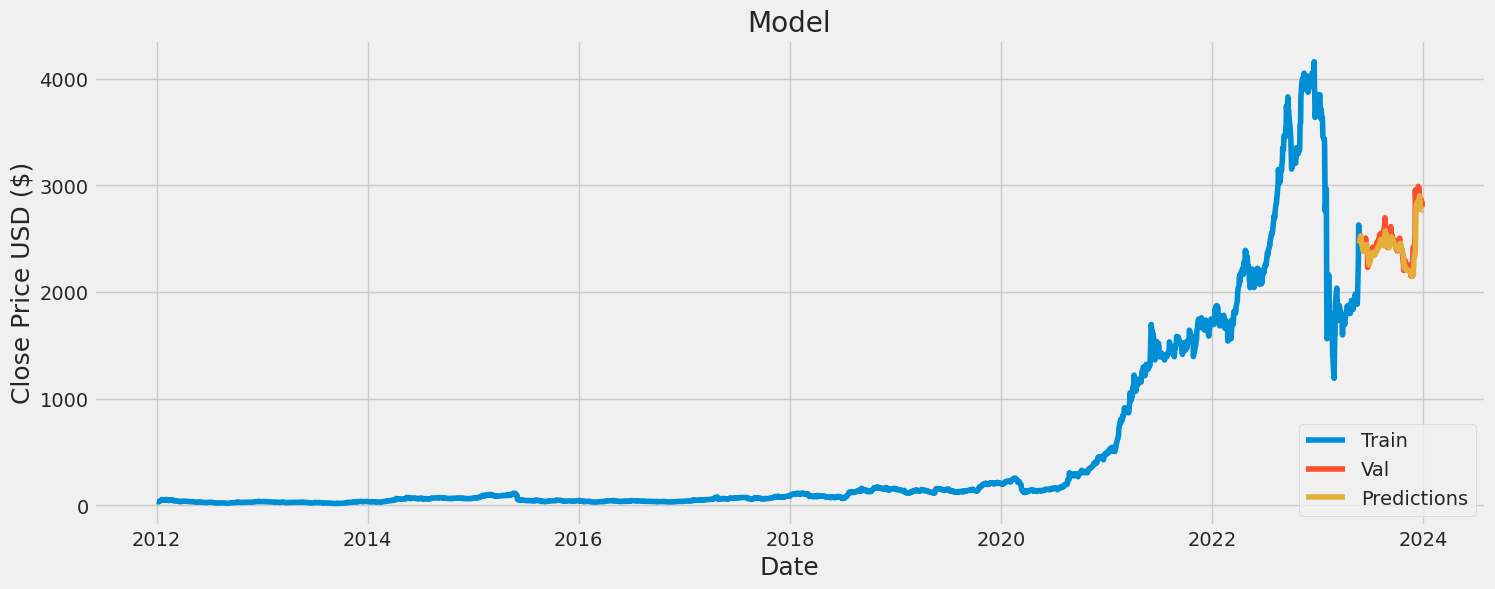

In [87]:
# Plot the data
train = data1[:training_data_len]
valid = data1[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

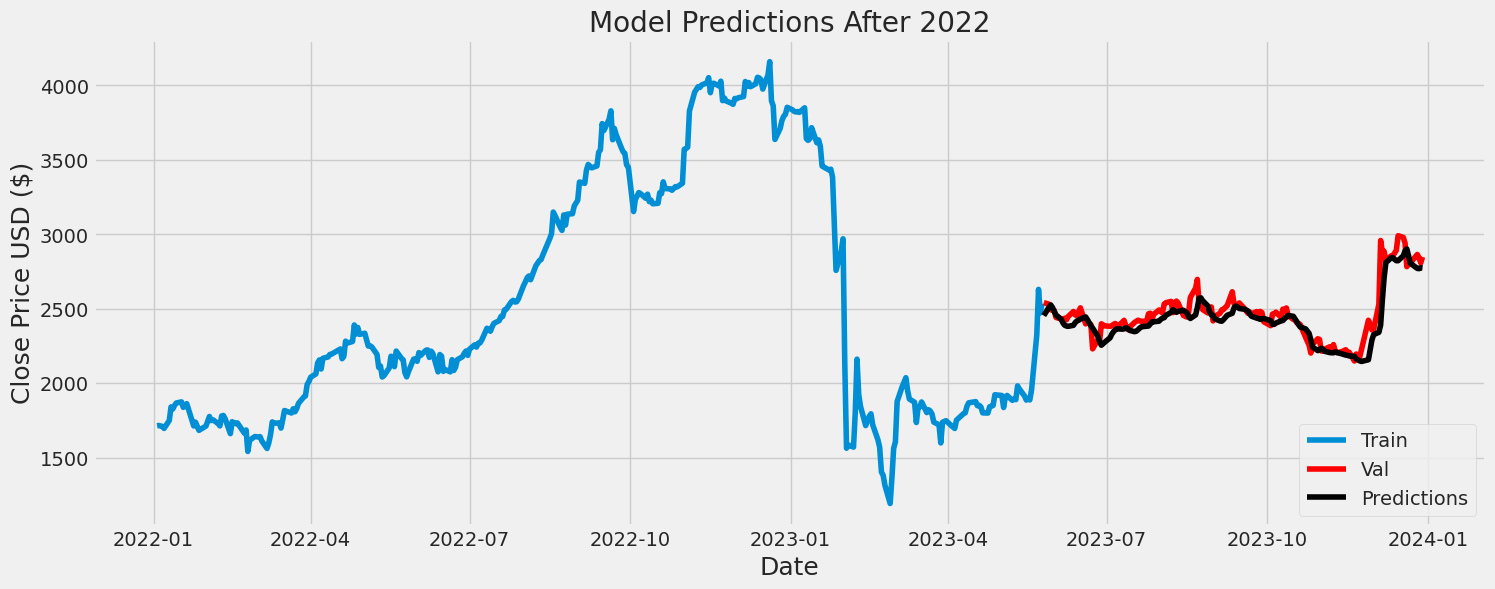

In [88]:
# Filter data after 2022 for better visualization
train_filtered = train.loc['2022-01-01':]
valid_filtered = valid.loc['2022-01-01':]

# Plot the data
plt.figure(figsize=(16,6))
plt.title('Model Predictions After 2022')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(train_filtered['Close'], label='Train')
plt.plot(valid_filtered['Close'], label='Val', color='red')
plt.plot(valid_filtered['Predictions'], label='Predictions', color='black')

plt.legend(loc='lower right')
plt.show()


In [89]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-05-26,2540.782715,2453.917480
2023-05-29,2530.497314,2509.903809
2023-05-30,2492.949707,2525.457275
2023-05-31,2489.854492,2508.343750
2023-06-01,2488.655762,2481.616455
...,...,...
2023-12-22,2807.218018,2805.612549
2023-12-26,2864.294922,2770.878906
2023-12-27,2842.203857,2769.405029


[*********************100%***********************]  1 of 1 completed


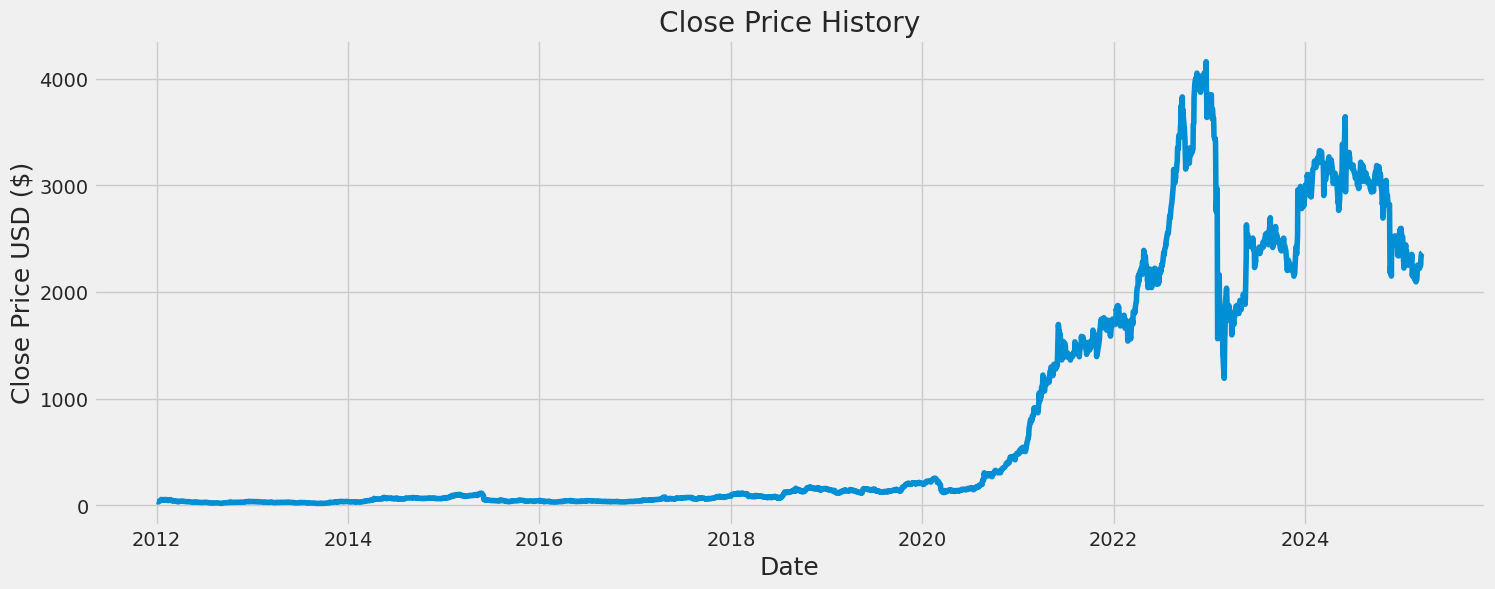

In [90]:
# Get the stock quote
df2 = yf.download('ADANIENT.NS', start='2012-01-01', end=datetime.now())

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df2['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [91]:
# Ensure df1 has the latest data
latest_data = df2[['Close']].copy()
dataset_latest = latest_data.values

# Normalize with the same scaler used earlier
scaled_latest_data = scaler.transform(dataset_latest)  # Use the same scaler fitted earlier


In [92]:
# Prepare new test data
test_data_latest = scaled_latest_data[training_data_len - 60:, :]
x_test_latest, y_test_latest = [], dataset_latest[training_data_len:, :]

for i in range(60, len(test_data_latest)):
    x_test_latest.append(test_data_latest[i-60:i, 0])

# Convert to NumPy arrays
x_test_latest = np.array(x_test_latest)

# Reshape for LSTM
x_test_latest = np.reshape(x_test_latest, (x_test_latest.shape[0], x_test_latest.shape[1], 1))


In [93]:
# Get model predictions on the latest data
predictions_latest = model.predict(x_test_latest)
predictions_latest = scaler.inverse_transform(predictions_latest)  # Convert back to original scale


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


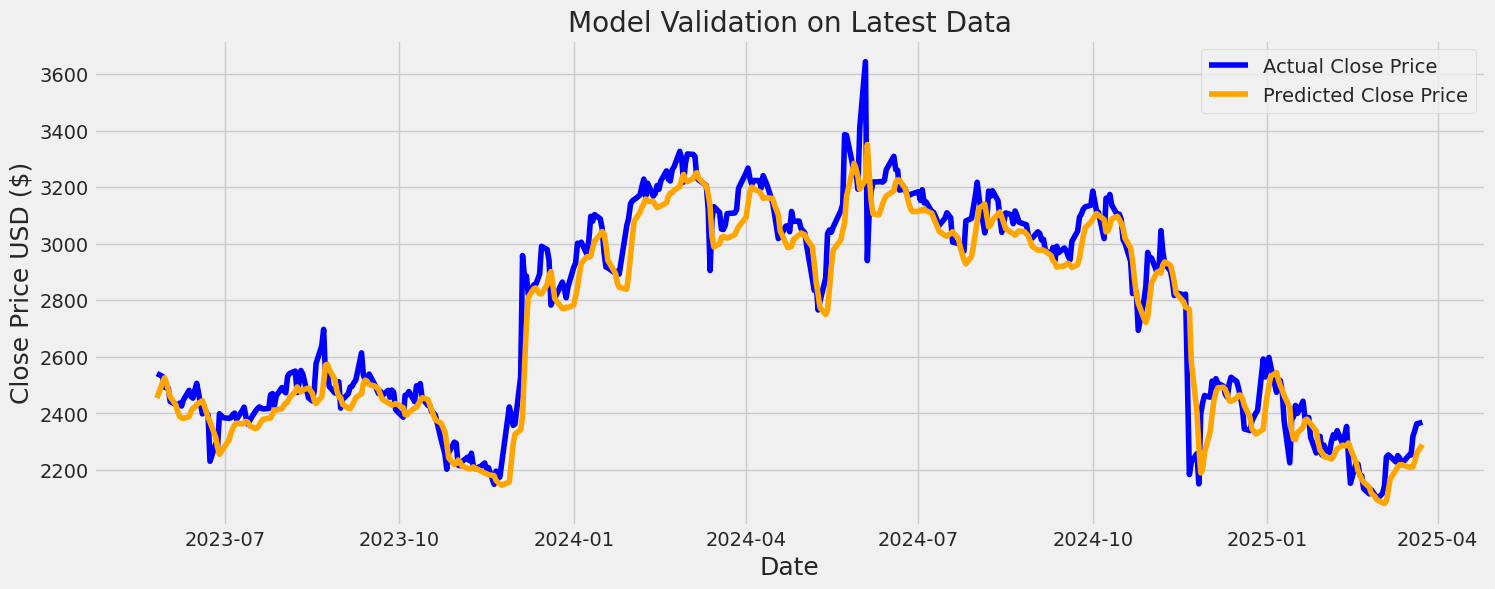

In [94]:
# Prepare validation dataframe
valid_latest = latest_data.iloc[training_data_len:].copy()
valid_latest['Predictions'] = predictions_latest

# Plot the validation results
plt.figure(figsize=(16,6))
plt.title('Model Validation on Latest Data')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(valid_latest['Close'], label='Actual Close Price', color='blue')
plt.plot(valid_latest['Predictions'], label='Predicted Close Price', color='orange')

plt.legend()
plt.show()


In [95]:
# Calculate RMSE for validation
rmse_latest = np.sqrt(np.mean((predictions_latest - y_test_latest) ** 2))
print("Validation RMSE:", rmse_latest)


Validation RMSE: 95.94466319822845
